Reference : https://www.kaggle.com/ash316/eda-to-prediction-dietanic  by Ashwini Swain


# EDA To Prediction (DieTanic)


### Sometimes life has a cruel sense of humor, giving you the thing you always wnated at the worst time possible. - Lisa Kleypas



The sinking of the Titanic is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. That's why the name DieTanic. This is a very unforgetable disaster that no one in the world can forget.

It took about $7.5 million to build the Titanic and it sunk under the ocean due to collision. The Titanic Dataset is a very good dataset for beginners to start a journey in data science and participate in competitions in Kaggle.

The Objective of this notebook is to give an idea how is the workflow in any predictive modeling problem. How do we check features, how do we add new features and some Machine Learning Concepts. I have tried to keep the notebook as basic as possible so that even newbies can understand every phase of it.

### Contents of the Notebook : 

#### Part1 : Exploratory Data Analysis(EDA) : 
1) Analysis of the features.
2) Finding any relations or trends considering multiple features.

#### Part2. Feature Engineering and Data Cleaning:
1) Adding any few features.
2) Removing redundant features.
3) Converting features into suitabe from for modeling.

#### Part3. Predictive Modeling
1) Running Basic Algorithms.
2) Cross Validation.
3) Ensembling.
4) Important Features Extraction.

## Part1 : Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
data = pd.read_csv('../kaggle/data/train.csv')

In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# checking for total null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The Age,Cabin and Embarked have null values. I will try to fix them.

#### How many Survived?

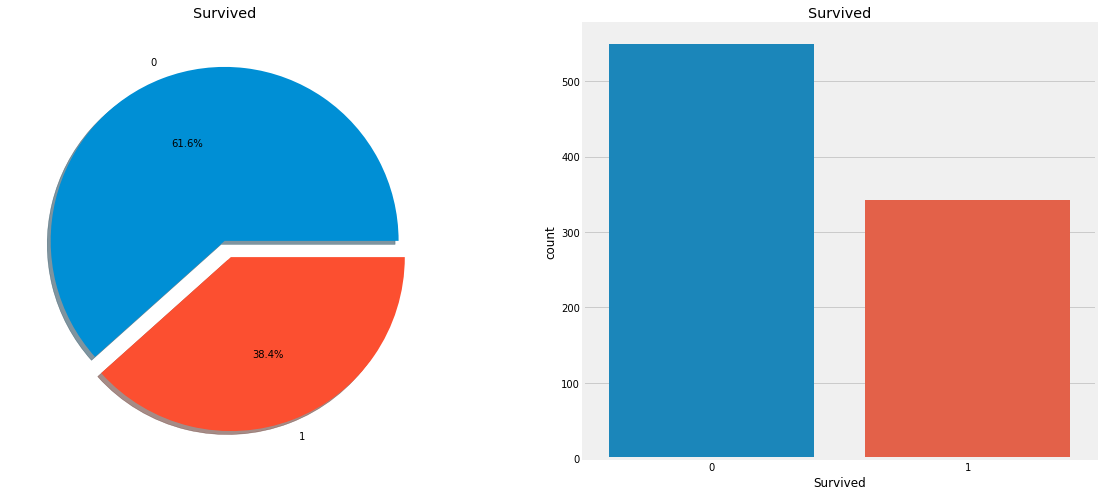

In [12]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
data['Survived'].value_counts().plot.pie(explode = [0, 0.1], autopct = '%1.1f%%',
                                        ax = ax[0], shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = data, ax = ax[1])
ax[1].set_title('Survived')
plt.show()

It is evident that not many passengers survived the accident.

Out of 891 passengers in training set, only around 350 survived i.e Only 38.4% of the total training set survived the crash. We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port of Embarcation, Age, etc.

First let us understand the different types of features.

## Types Of Features

### Categorical Features:
A categorical variable in one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable havivng two categories (male and female). Now we cannot sort or give any ordering to such variables. They are also known as Nominal Variables.

#### Categorical Features in the dataset: Sex, Embarked.

### Ordinal Features:
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For eg: If we have a feature like Height with values Tall, Medium, Short, then Height is a ordinal variable. Here we can have a relative sort in the variable.

#### Ordinal Features in the dataset : PClass

### Continous Feature:
A feature is said to be continous if it can take values between any two points or between the minimum or maximum values in the features column.

#### Continous Feature in the dataset : Age

## Analysing The Features

### Sex -> Categorical Feature

In [13]:
data.groupby(['Sex', "Survived"])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

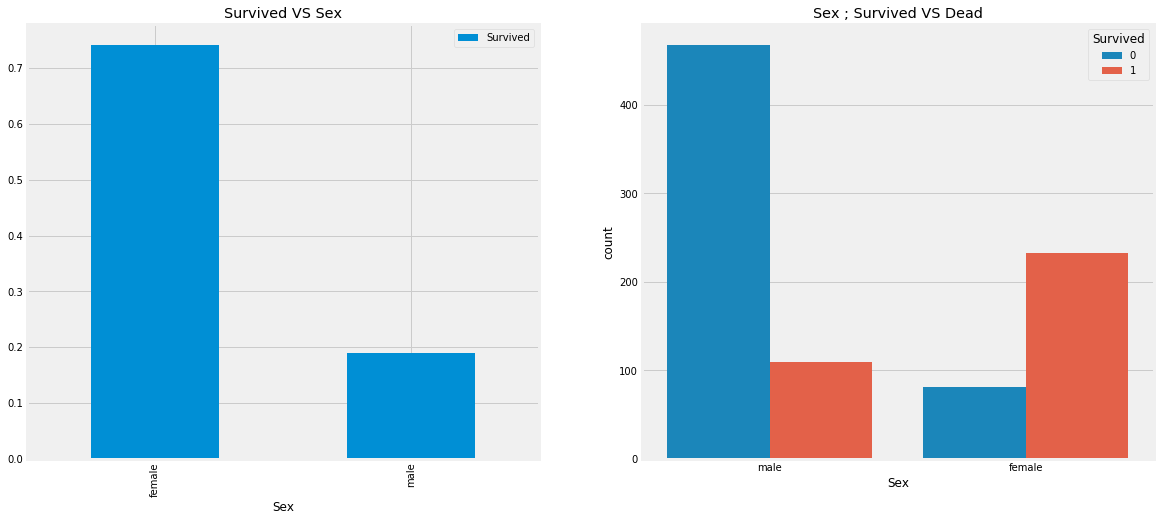

In [15]:
f,ax = plt.subplots(1, 2, figsize = (18, 8))
data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived VS Sex')
sns.countplot('Sex', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Sex ; Survived VS Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of wome. Still the number of women saved is alomost twice the number of males saved. The survival rates for a women on the ship is around 75% while that for men in around 18%-19%.

This looks to be a very important feature for modeling. But is it the best? Let's check other features.

### Pclass -> Ordinal Feature

In [18]:
pd.crosstab(data.Pclass, data.Survived, margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


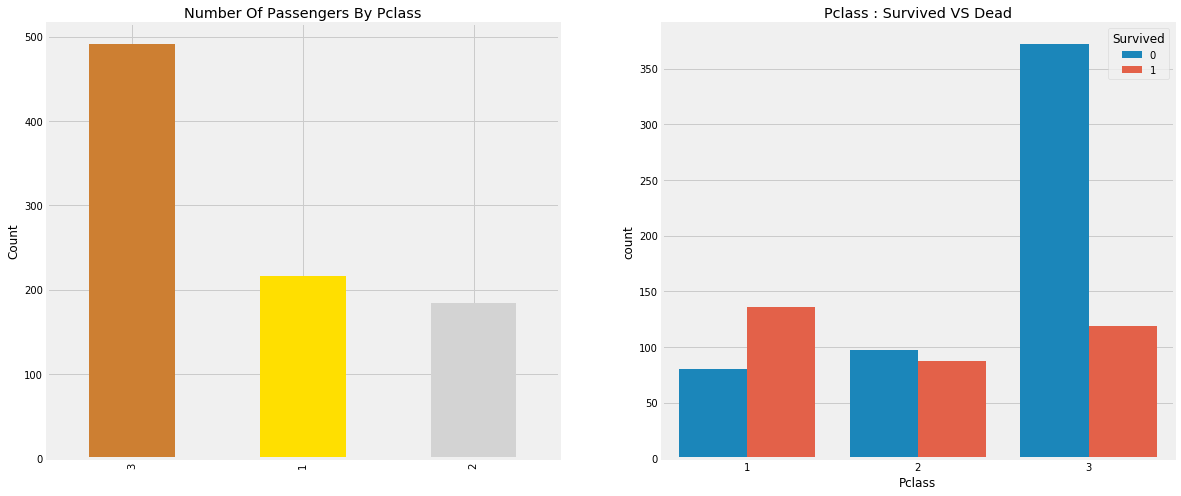

In [20]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
data['Pclass'].value_counts().plot.bar(color = ['#CD7F32','#FFDF00','#D3D3D3'], ax = ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue = 'Survived', data = data, ax = ax[1])
ax[1].set_title('Pclass : Survived VS Dead')
plt.show()

People say Money Can't Buy Everything. But we can celarly see that Passengers Of Pclass 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around 25%.

For Pclass 1% survived is around 63% while for Pclass 2 is around 48%. So money and status matters.Such a materialistic world.

Let's Dive in little bit more and check for other interesting observations. let's check survival rate with Sex and Pclass Together.

In [22]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins = True).style.background_gradient(cmap = 'summer_r')

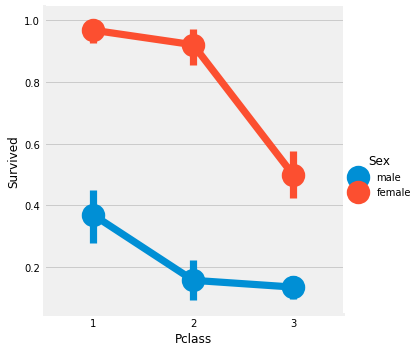

In [23]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = data)
plt.show()

We use FactorPlot in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and the FactorPlot, we can easily infer that survival for Women from Pclass 1 is about 95-96%, as only 3 out of 94 Women from Pclass 1 died.

It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass 1 have a very low survival rate.

Looks like Pclass is also an important feature. Let's analyse other features.

### Age -> Continous Feature

In [25]:
print('Oldest Passenger was of:', data['Age'].max(), 'Years')
print('Youngest Passenger was of:', data['Age'].min(), 'Years')
print('Average Age on the ship:', data['Age'].mean(), 'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


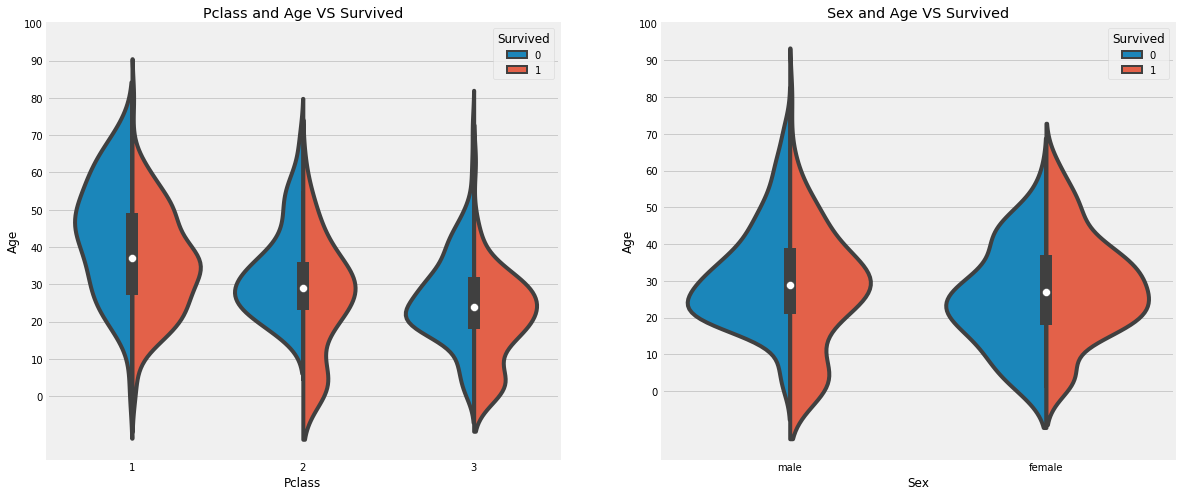

In [28]:
f, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.violinplot("Pclass", "Age", hue = "Survived", data = data, split = True, ax = ax[0])
ax[0].set_title('Pclass and Age VS Survived')
ax[0].set_yticks(range(0, 110, 10))
sns.violinplot("Sex", "Age", hue = "Survived", data = data, split = True, ax = ax[1])
ax[1].set_title('Sex and Age VS Survived')
ax[1].set_yticks(range(0, 110, 10))
plt.show()

#### Observations:
1. The numeber of children increases with Pclass and the survival rate for passengers below Age 10 (i.e children) looks to be good irrespective of the Pclass.

2. Survival changes for Passengers aged 20-50 from Pclass 1 is high and is even better for Women.

3. For males, the survival chances decreases with an increases in age.

As we had seen earlier, the Age feature has 177 null values. To replace these NAN values, we can assign them the mean of age of the dataset.

But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie?

Bingo!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

#### "What's In A Name?" -> Feature ;P

In [31]:
data['Initial'] = 0
for i in data:
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')

    # Let's extract the Salutations

Okay so here we are using the Regex : [A-Za-z] + ).. So what it does is, it looks for strings which lie between A-Z or a-z and followed by a .(dot). So we successfully extract the Initials from the Name.

In [32]:
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap = 'summer_r')

# Checking the Initials with the sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


Okay So there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [33]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'], inplace = True)

In [34]:
data.groupby('Initial')['Age'].mean()

# Let's check the average age by Initials

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NAN Ages

In [35]:
## Assigning the NaN Values with the Ceil values of the mean ages

data.loc[(data.Age.isnull())&(data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'), 'Age'] = 36
data.loc[(data.Age.isnull())&(data.Initial=='Master'), 'Age'] = 5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'), 'Age'] = 22
data.loc[(data.Age.isnull())&(data.Initial=='Other'), 'Age'] = 46

In [36]:
data.Age.isnull().any()

# So no null values left finally

False

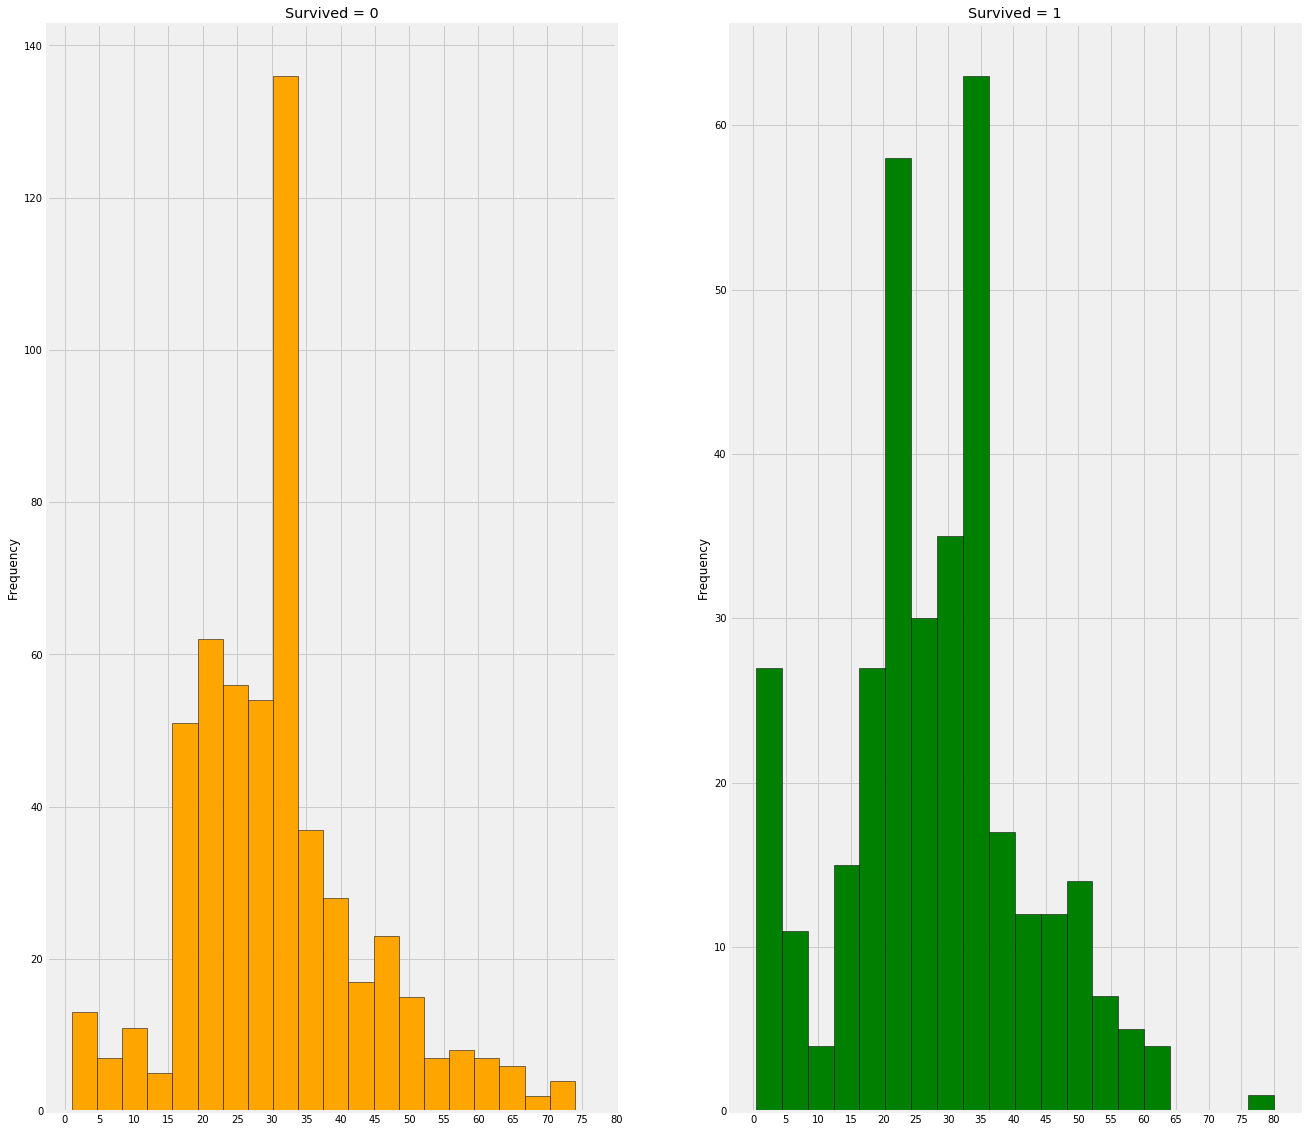

In [41]:
f, ax = plt.subplots(1, 2, figsize = (20, 20))
data[data['Survived'] == 0].Age.plot.hist(ax = ax[0], bins = 20, edgecolor = 'black', color = 'orange')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)
data[data['Survived'] == 1].Age.plot.hist(ax = ax[1], color = 'green', bins = 20, edgecolor = 'black')
ax[1].set_title('Survived = 1')
x2 = list(range(0, 85, 5))
ax[1].set_xticks(x2)
plt.show()

### Observations:
1. The Toddlers (age<5) were saved in large numbers (The Women and Child First Policy).
2. The oldest Passenger was saved (80 years).
3. Maximum number of deaths were in the age group of 30-40.

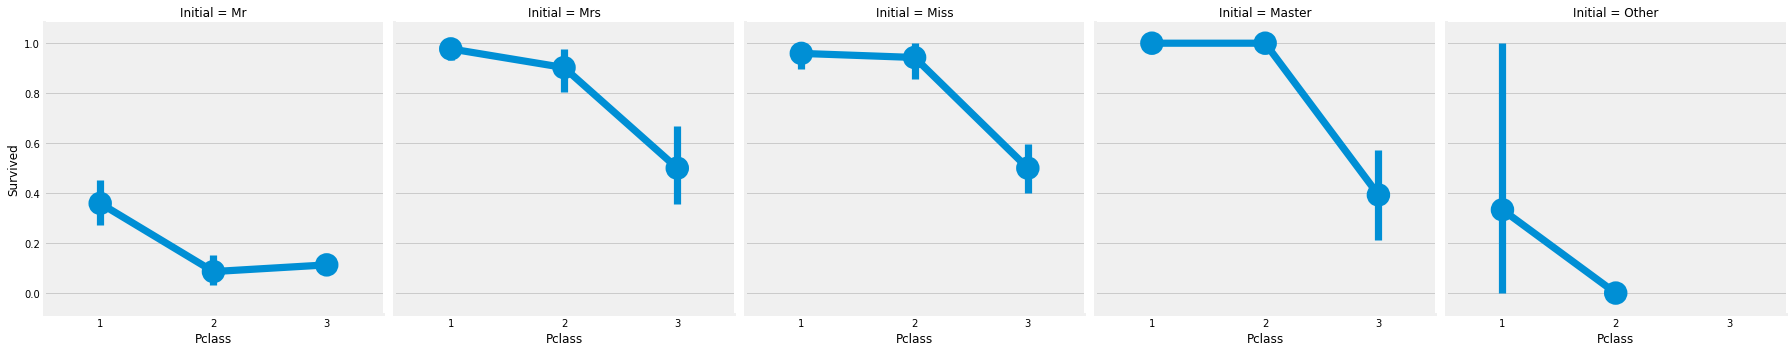

In [42]:
sns.factorplot('Pclass', 'Survived', col = 'Initial', data = data)
plt.show()

The Women and Child first policy thus holds true irrespective of the class.

### Embarked -> Categorical Value

In [43]:
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins = True).style.background_gradient(cmap = 'summer_r')

### Chances for Survival by Port Embarkation

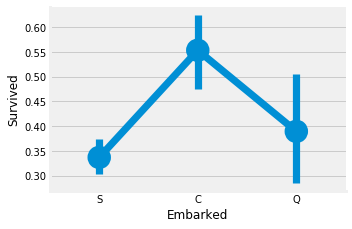

In [44]:
sns.factorplot('Embarked', 'Survived', data = data)
fig = plt.gcf()
fig.set_size_inches(5,3)
plt.show()

The chances for survival for Port C is highest around 0.55 while it is lowest for S.

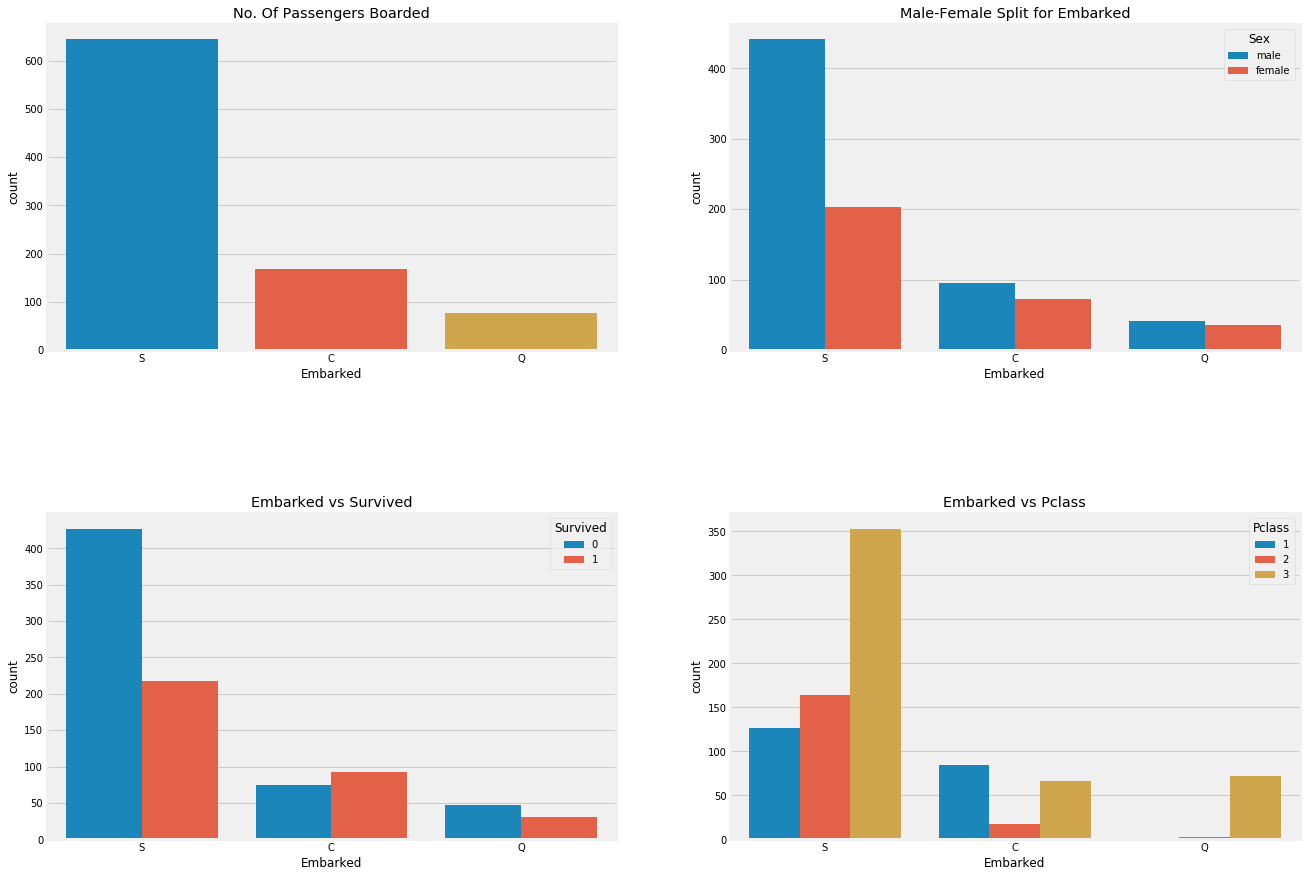

In [45]:
f, ax = plt.subplots(2, 2, figsize = (20, 15))
sns.countplot('Embarked', data = data, ax = ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked', hue = 'Sex', data = data, ax = ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked', hue = 'Survived', data = data, ax = ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked', hue = 'Pclass', data = data, ax = ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
plt.show()

### Observations:
1. Maximum passengers boarded from S. Majority of them being from Pclass 3.

2. The Passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass 1 and Pclass 2 Passengers.

3. The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because may passengers from Pclass 3 around 81% didn't survive.

4. Port Q had almost 95% of the passengers were from Pclass 3.

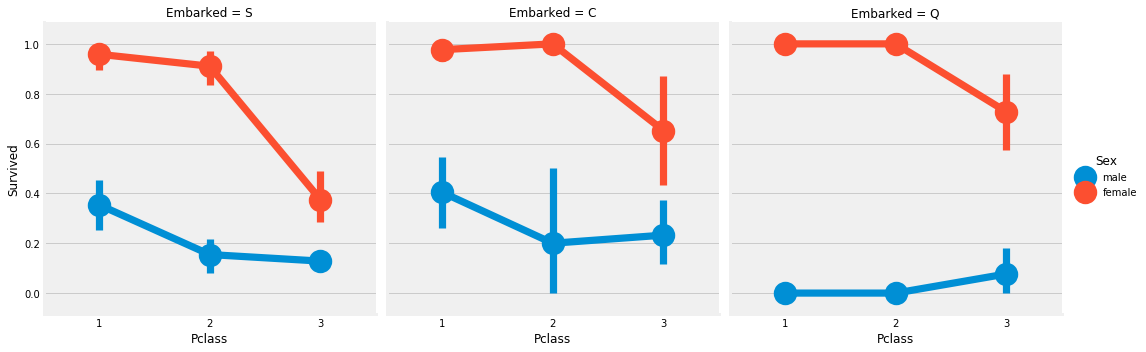

In [46]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', col = 'Embarked', data = data)
plt.show()

### Observations:

1. The survival chances are almost 1 for women for Pclass 1 and Pclass 2 irrespective of the Pclass.
2. Port S looks to be very unlucky for Pclass 3 Passengers as the survival rate for both men and women is very low. (Money Matters)
3. Port Q looks to be unluckiest for Men, as almost all were from Pclass 3.

### Filling Embarked NaN
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [47]:
data['Embarked'].fillna('S', inplace = True)

In [48]:
data.Embarked.isnull().any()
# Finally No NaN values

False

### SibSip -> Discrete Feature
This feature represents whether a person is alone or with his family members.

Sibling = brother, sister, stepbrother, stepsister

Spouse = husband, wife

In [49]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap = 'summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


IndexError: too many indices for array

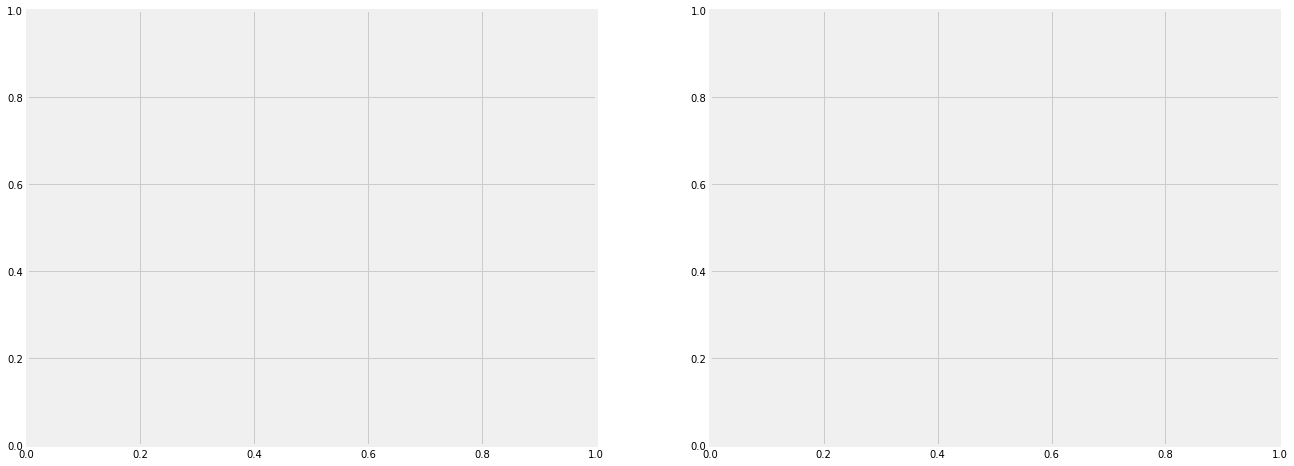

In [71]:
f,ax = plt.subplots(1, 2, figsize = (20, 8))
sns.barplot('SibSp', 'Survived', data = data, ax = ax[0])
ax[0].set_title('SibSp vs Survived')
sns.factorplot('SibSp', 'Survived', data = data, ax = ax[1])
ax[1].set_title('SibSp vs Survived')
plt.close(2)  ## 뭔가 이상하다
plt.show()

In [63]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


### Observations:
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increases. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Surprisingly the survival for families with 5-8 members is 0%. The reason may be Pclass?

The reason is Pclass. The crosstab shows that Person with SibSp > 3 were all in Pclass 3. It is imminent that all the large families in Pclass 3 (>3) died.

## Parch

In [64]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap = 'summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass 3.

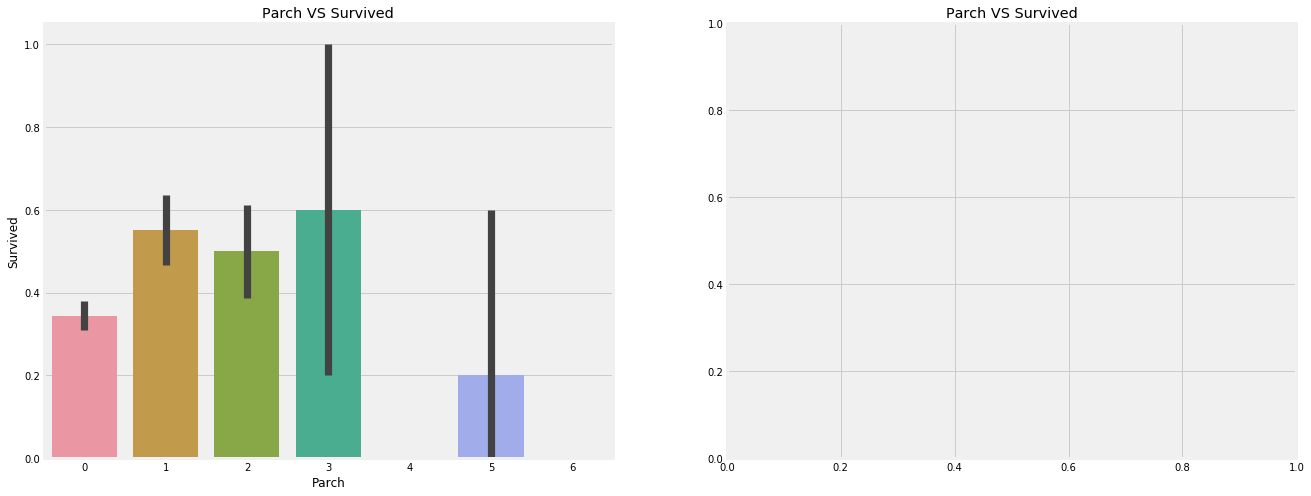

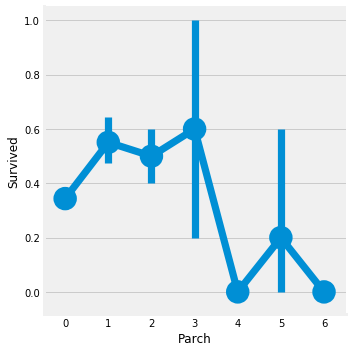

In [74]:
f, ax = plt. subplots(1, 2, figsize = (20, 8))
sns.barplot('Parch', 'Survived', data = data, ax = ax[0])
ax[0].set_title('Parch VS Survived')
sns.factorplot('Parch', "Survived", data = data, ax = ax[1])
ax[1].set_title('Parch VS Survived')
plt.close(5)
plt.show()

### Observations:
Here too the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.

The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has >4 parents on the ship.

### Fare -> Continous Feature

In [77]:
print('Highest Fare was:', data['Fare'].max())
print('Lowest Fare was:', data['Fare'].min())
print('Average Fare was:', data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is 0.0 WoW!! a free luxorious ride!

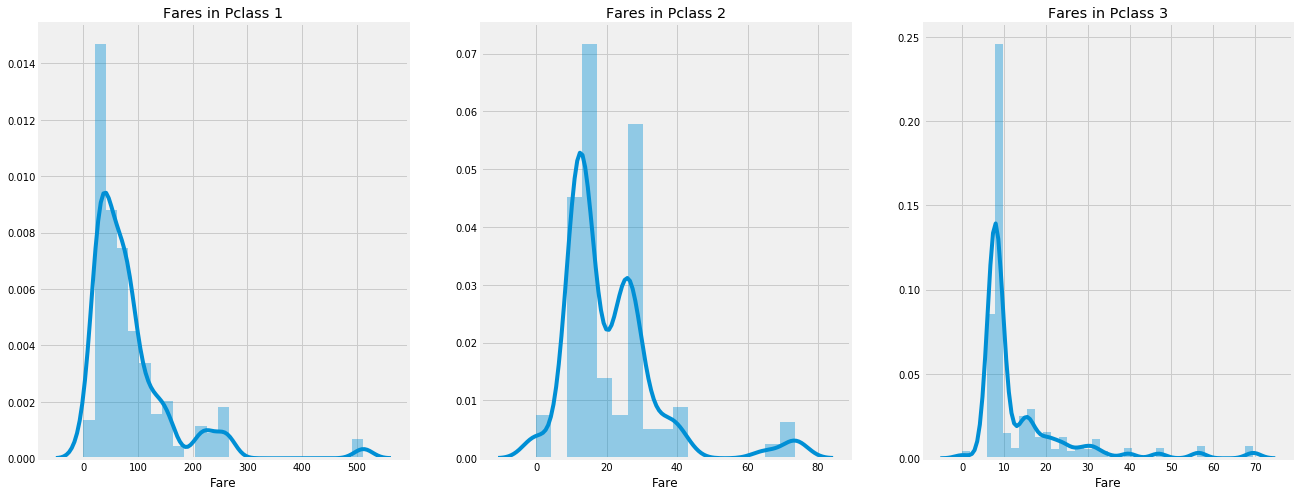

In [82]:
f, ax = plt.subplots(1,3, figsize = (20,8))
sns.distplot(data[data['Pclass'] == 1].Fare, ax = ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(data[data['Pclass'] == 2].Fare, ax = ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(data[data['Pclass'] == 3].Fare, ax = ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

There looks to be a large distribution in the fares of Passengers in Pclass 1 and this distribution goes on decreasing as the standard reduces. As this is also continous, we can convert into discrete values by using binning.

### Observations in a Nutshell for all features:
- Sex : the chance of survival for women is high as compared to men.

- Pclass : There is a visible trend that being a 1st class passenger gives you better chances of survival. The survival rate for Pclass 3 is very low. For women, the chance of survival from Pclass 1 is almost 1 and is high too for those from Pclass 2. Money Wins!

- Age : Children less than 5-10 years do have a high chance of survival. Passengers between age group 15 to 35 died a lot.

- Embarked : This is a very interesting feature. The chances of survival at C loos to be better than even though the majority of Pclass 1 passengers got up at S. Passengers at Q were all from Pclass 3.

- Parch + SibSp : Having 1-2 siblings, spouse on board or 1-3 Parents shows a greater chance of probability rather than being alone or having a large family travelling with you.

### Correlation Between  The Features

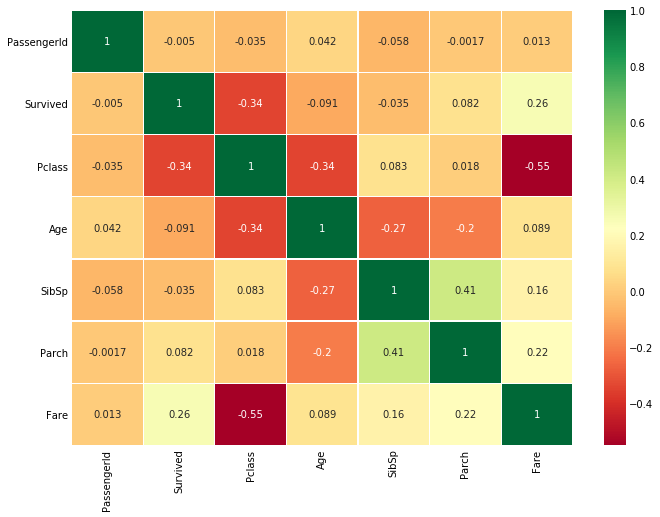

In [84]:
sns.heatmap(data.corr(), annot = True, cmap = 'RdYlGn', linewidths = 0.2)
# data.corr() --> correlation matrix
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

### Interpreting The Heatmap
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.

* POSITIVE CORRELATION : if an increase in feature A leads to increase in feature B, then they are positively correlated. A value 1 means perfect positive correlation.

* NEGATIVE CORRELATION : if an increase in feature A leads to decrease in feature B, then they are nagatively correlated. A value -1 means perfect negative correlation.

Now let's say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other.This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as MultiColinearity as both of them contains almost the same information.

So do you think we should use both of them as one of them is redundant. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.

Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between SibSp and Parch i.e 0.41. So we can carry on with all features.

Reference : https://www.kaggle.com/ash316/eda-to-prediction-dietanic  by Ashwini Swain